<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exercise-2" data-toc-modified-id="Exercise-2-1">Exercise 2</a></span></li></ul></div>

# Exercise 2

- read in the brain_size data from github: 
- identify any missing data
- replace missing values with the mean of the column
- What is the mean value of VIQ for the full population?

- How many males were included in the study? Females? ?
- create a pairplot showing all numeric values.

- Use a groupby to determine the mean value for each numeric column
- If there is a difference in the VIQ mean for the male and female populations, use a tttest to determine if the difference is significant
- Determine if the difference in means of FSIQ and PIQ is significant

 

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('/Users/jimcody/Documents/2021Python/statistics/data/brain_size.csv', sep = ';')
df.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118,64.5,816932
1,2,Male,140,150,124,.,72.5,1001121
2,3,Male,139,123,150,143,73.3,1038437
3,4,Male,133,129,128,172,68.8,965353
4,5,Female,137,132,134,147,65.0,951545


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.isnull().sum()

Gender       0
FSIQ         0
VIQ          0
PIQ          0
Weight       0
Height       0
MRI_Count    0
dtype: int64

In [5]:
df.groupby('Gender').mean()

,FSIQ,VIQ,PIQ,MRI_Count
Gender,,,,
Female,111.9,109.45,110.45,862654.6
Male,115.0,115.25,111.60,954855.4


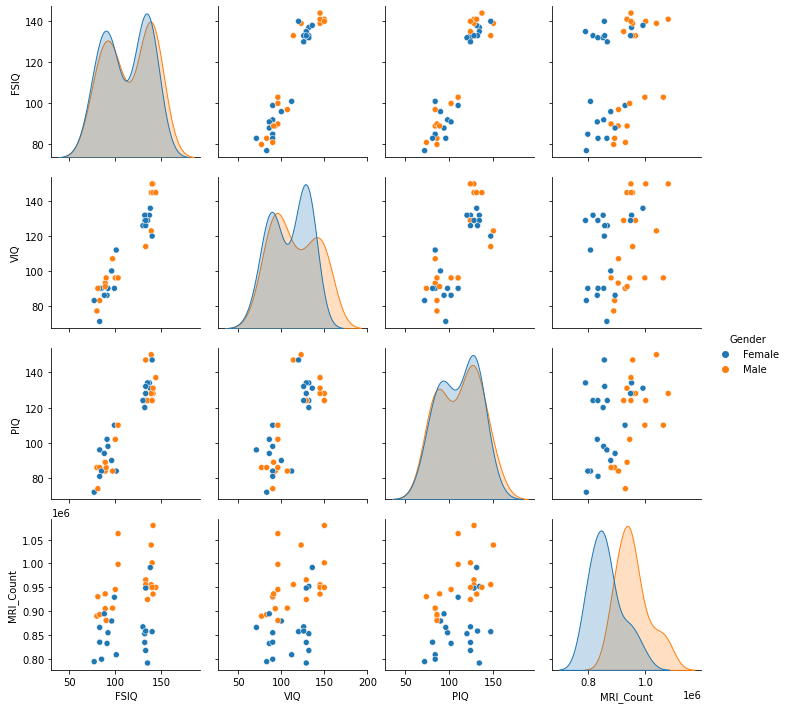

In [6]:
sns.pairplot(data = df, hue = 'Gender')

In [7]:
stats.ttest_1samp(df['VIQ'], 0) 

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

In [8]:
female_viq = df[df['Gender'] == 'Female']['VIQ']
male_viq = df[df['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)   

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

In [9]:
stats.ttest_ind(df['FSIQ'], df['PIQ'])   

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)